# Project: No-show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
<div style="text-align: justify">
The aim of this project is to conduct a thorough investigation of a medical appointment dataset collected from 100,000 patients in Brazil. The dataset contains information on various characteristics of patients, including age, gender, and neighborhood, as well as whether or not they showed up for their scheduled appointment. The primary focus of this project is to answer the question of whether there is a relationship between these patient characteristics and the likelihood of them attending their appointment. Through careful analysis and interpretation of the data, we aim to gain insights into the factors that may influence patient attendance and inform strategies for improving appointment adherence in the future.
</div>

### Question(s) for Analysis

This question group set ilustrates the relationships between several variables that affect the patient to make it to his appiontment by looking at how two independent variables relate to a single dependent variable:

* How does gender affects the number of patients attended and did not attended the appointment?

* How does age affects the number of patients attended and did not attended the appointment?

* How does the Scholarship affects the number of patients attended and did not attended the appointment?

* How does received SMS affects the number of patients attended and did not attended the appointment?

* How does gender affects the number of patients attended and did not attended the appointment compared with age ?


In [1]:
# Here are the import statements for all of the packages needed in the project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function.
!pip install --upgrade pandas==0.25.1

Requirement already up-to-date: pandas==0.25.1 in /opt/conda/lib/python3.6/site-packages (0.25.1)


In [3]:
!pip install -U seaborn

Requirement already up-to-date: seaborn in /opt/conda/lib/python3.6/site-packages (0.11.2)


<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [4]:
# Load the data and print out a few lines. 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# Performing operations to inspect data types and look for instances of missing or possibly errant data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# show a quick descriptive data summary
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning

In [7]:
# check for duplicates
df.duplicated().sum()

0

In [8]:
# check the number of unique patients
df.PatientId.nunique()

62299

In [9]:
# Replace negative values for age with a zero value
df['Age'].replace({-1: 0}, inplace=True)

In [10]:
# Convert appointment statues datatype from object to boolean
df['No-show'].replace({'No': 0, 'Yes': 1}, inplace=True)
df['No-show'] = df['No-show'].astype('bool')

In [11]:
df.rename(columns={'No-show':'No_show'},inplace=True)

In [12]:
# show a descriptive data summary after data cleaning
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088883,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110190,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis



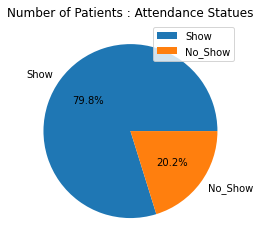

In [13]:
# Quick exploratory to see patient attendance
pt_attendance = df.No_show.value_counts()
labels = ['Show', 'No_Show']
plt.pie(pt_attendance , labels = labels, autopct= '%1.1f%%');
plt.title("Number of Patients : Attendance Statues");
plt.legend();
plt.show();

<hr />
The analysis shows that around 20% of the patients did not show up for their appointments. Therefore, we need to examine the given parameters more closely to investigate the reason for this.
<hr />

### Single Variable Questionnaire

#### How does gender affects the number of patients attended and did not attend the appointment?

In [14]:
# Define a function "analyze" that plots the statues of a specific character for all patients from the dataset. 
def analyze(f,t,x,y,a,b):
    sns.set_theme(style="whitegrid")
    sns.countplot(x=df[f])
    plt.title(t)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.xticks([0, 1],[a,b])
    plt.show();

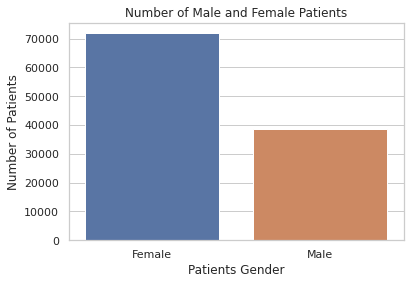

In [15]:
# Patients "Gender" analysis.
analyze("Gender","Number of Male and Female Patients","Patients Gender","Number of Patients",'Female','Male')

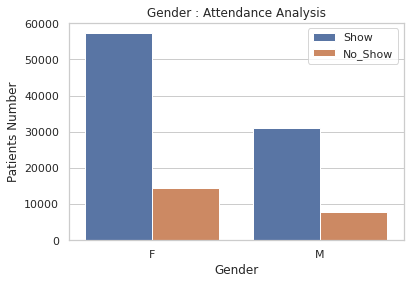

In [16]:
# Patients "Gender" analysis with respect to attendance.
sns.set_theme(style="whitegrid")
sns.countplot(data=df, x="Gender", hue="No_show")
plt.legend(["Show", "No_Show"]);
plt.title('Gender : Attendance Analysis')
plt.xlabel('Gender')
plt.ylabel('Patients Number')
plt.show();

In [17]:
#Patients "Gender" analysis comparison
df.groupby('Gender').No_show.value_counts()

Gender  No_show
F       False      57246
        True       14594
M       False      30962
        True        7725
Name: No_show, dtype: int64

<hr />
The investigation found that more females than males attended the appointment, indicating that females place a higher importance on their health.
<hr />

#### How does age affects the number of patients attended and did not attend the appointment?

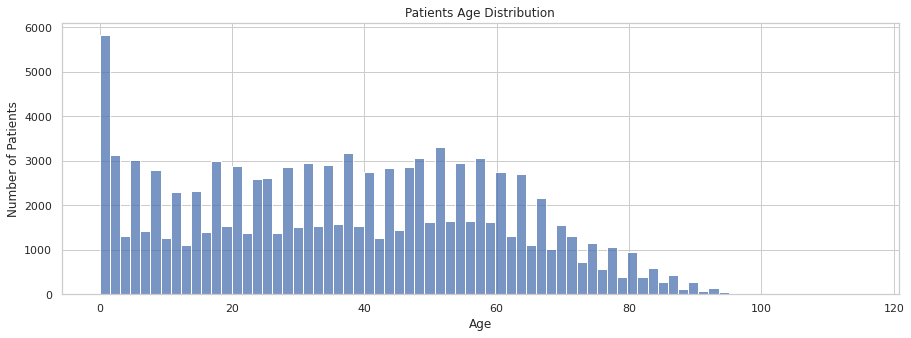

In [18]:
# Patients "Age" analysis
sns.set_theme(style="whitegrid")
plt.figure(figsize=[15,5])
sns.histplot(data = df, x = 'Age')
plt.title("Patients Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.show();

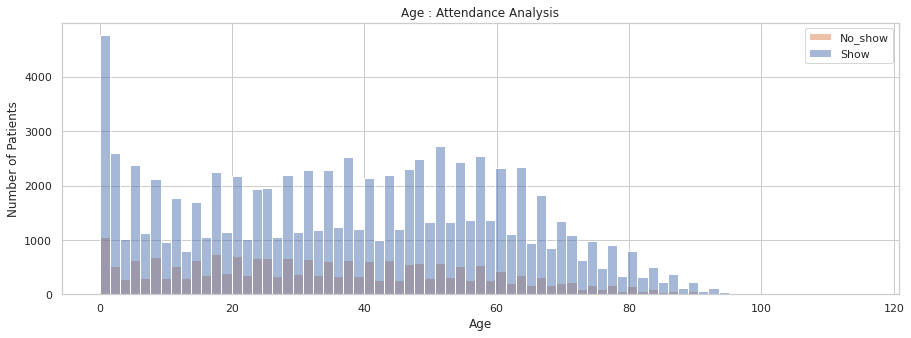

In [19]:
# Patients "Age" analysis with respect to attendance.
sns.set_theme(style="whitegrid")
plt.figure(figsize=[15,5])
sns.histplot(data = df, x = 'Age', hue="No_show")
plt.legend(["No_show", "Show"]);
plt.title("Age : Attendance Analysis")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.show();

<hr />
The majority of the attended patients belong to the adult and middle-aged categories. where as children and elders are less likely to attended. this could be due to less medical experties are provided for these to categories.
<hr />

#### How does the Scholarship affects the number of patients attended and did not attend the appointment?

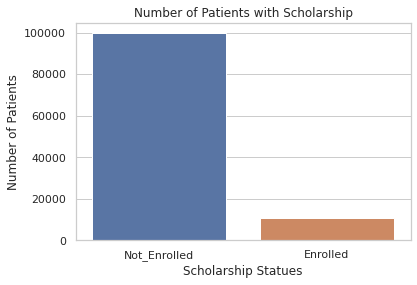

In [20]:
# Patients "Scholarship" analysis.
analyze("Scholarship","Number of Patients with Scholarship","Scholarship Statues",
        "Number of Patients",'Not_Enrolled','Enrolled')

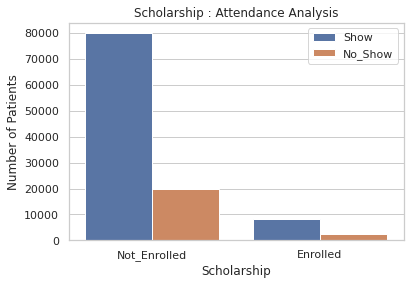

In [21]:
# Patients "Scholarship" analysis with respect to attendance.
sns.set_theme(style="whitegrid")
sns.countplot(data=df, x="Scholarship", hue="No_show")
plt.legend(["Show", "No_Show"]);
plt.title("Scholarship : Attendance Analysis")
plt.xlabel("Scholarship")
plt.ylabel("Number of Patients")
plt.xticks([0, 1],['Not_Enrolled','Enrolled'])
plt.show();

In [22]:
#Patients "Scholarship" analysis comparison
df.groupby('Scholarship').No_show.value_counts()

Scholarship  No_show
0            False      79925
             True       19741
1            False       8283
             True        2578
Name: No_show, dtype: int64

<hr />
Out of all the patients, 10861 do not have a scholarship. This suggests that further investigation may not be very informative in this case, as almost all patients share this characteristic. However, it is still worth examining how the scholarship affects attendance.
<hr />

#### How does received SMS affects the number of patients attended and did not attend the appointment?

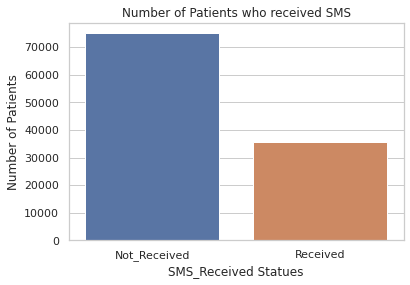

In [23]:
# Patients "Received SMS" analysis.
analyze("SMS_received","Number of Patients who received SMS","SMS_Received Statues",
        "Number of Patients",'Not_Received','Received')

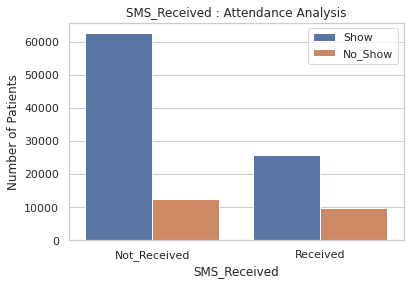

In [24]:
# Patients "SMS_Received" analysis with respect to attendance.
sns.set_theme(style="whitegrid")
sns.countplot(data=df, x="SMS_received", hue="No_show")
plt.legend(["Show", "No_Show"]);
plt.title("SMS_Received : Attendance Analysis")
plt.xlabel("SMS_Received")
plt.ylabel("Number of Patients")
plt.xticks([0, 1],['Not_Received','Received'])
plt.show();

In [25]:
#Patients "SMS_received" analysis comparison
df.groupby('SMS_received').No_show.value_counts()

SMS_received  No_show
0             False      62510
              True       12535
1             False      25698
              True        9784
Name: No_show, dtype: int64

<hr />
The investigation found that receiving a SMS reminder reduces the no-show rate, as appointments with a reminder had a lower rate of no-shows than those without.
<hr />

<a id='conclusions'></a>
## Conclusions

According to the dataset, the investigation has taken a closer look at four key areas of interest, including Gender, Age, SMS received, and Scholarship. The objective of the analysis is to identify which of these characteristics have the greatest impact on patient attendance, in order to enhance the medical appointment system.

* The investigation indicates that there are more females than males, and the analysis reveals that a greater proportion of females attended the appointment compared to males, demonstrating that females place a greater emphasis on taking care of their health.

* The investigation indicated that receiving an SMS reminder has a positive impact on the no-show rate, as appointments with a reminder have a lower rate of no-shows compared to those without a reminder.

* Patient age investigation shows that the number of attendace didnt increase by age, where the majorty of the attended patients lies in the both classs of adults and middle aged that varies from 19 to 64 according to the national institute of health classification. A further investigation should be implemented in order to justify why elders are less frequent to show up in their appointments.

### Limitations

The enrollment status in the scholarship program appears to have minimal significance, as the number of patients who have attended and not enrolled is significantly higher than those who are enrolled, with a ratio of 79925 to 8283. As a result, this characteristic can be disregarded in further investigations.

 
A deeper examination can be carried out by utilizing other features as the medical record and location, which would provide valuable insight of patient attendance statues.


In [27]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0